# Assemble Garcia & Keeling 2001 O$_2$ flux product

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
import yaml

import numpy as np
import xarray as xr

from netCDF4 import default_fillvals

import matplotlib.pyplot as plt

import intake

import config
import fgo2_gk2001
import regrid_tools
import util

### Generate datasets

### Shifting and scaling
The recommended Garcia and Keeling rescaling is 0.82 
(Naegler 2006 vs. Wanninkhof 1992 scaling factors 0.32/0.39), plus a 10-day shift later, to allow for mixed layer equilibration.

In [3]:
shift_time = 0.
scaleby = 0.82

ds = fgo2_gk2001.open_flux_dataset(scaleby=scaleby, clobber=True)
ds

<xarray.Dataset>
Dimensions:       (time: 12, lat: 160, lon: 320)
Coordinates:
  * time          (time) float64 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
  * lat           (lat) float64 -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * lon           (lon) float64 -179.4 -178.3 -177.2 ... 177.2 178.3 179.4
Data variables:
    area          (lat, lon) float64 1.536e+08 1.536e+08 ... 1.536e+08 1.536e+08
    date          (time) float64 2e+07 2e+07 2e+07 2e+07 ... 2e+07 2e+07 2e+07
    fgo2_ann      (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_sea      (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_thm_ann  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_thm_sea  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_bio_ann  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_bio_sea  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [4]:
time, time_bnds = util.gen_midmonth_cftime_coord((2009, 2009), shift_time=shift_time, climatology_year_end=2009)
date = util.gen_date_variable(time)
time

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(2009, 1, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 3, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 4, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 5, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 6, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 7, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 8, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 9, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 10, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 12, 17, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Dimensions without coordinates: time
Attributes:
    shift_time:   0.0
    climatology:  climatology_bounds

In [5]:
time

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(2009, 1, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 3, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 4, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 5, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 6, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 7, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 8, 17, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 9, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 10, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2009, 12, 17, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Dimensions without coordinates: time
Attributes:
    shift_time:   0.0
    climatology:  climatology_bounds

In [6]:
ds['time'] = time
ds[time.climatology] = time_bnds
ds['date'] = date
ds

<xarray.Dataset>
Dimensions:             (time: 12, lat: 160, lon: 320, d2: 2)
Coordinates:
  * time                (time) object 2009-01-17 00:00:00 ... 2009-12-17 00:0...
  * lat                 (lat) float64 -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * lon                 (lon) float64 -179.4 -178.3 -177.2 ... 177.2 178.3 179.4
Dimensions without coordinates: d2
Data variables:
    area                (lat, lon) float64 1.536e+08 1.536e+08 ... 1.536e+08
    date                (time) int64 20090117 20090215 ... 20091116 20091217
    fgo2_ann            (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_sea            (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_thm_ann        (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_thm_sea        (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_bio_ann        (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_bio_sea        (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    climatology_bounds  (time, d2) object 2009-01-01 00:00:00 ... 2009-01-01 ...

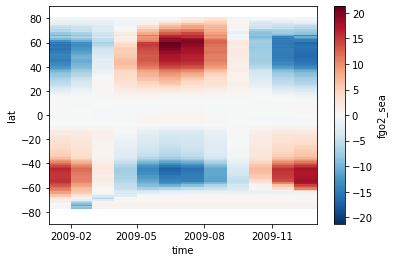

In [7]:
ds.fgo2_sea.mean("lon").T.plot()

Global sum Gruber: -0.1000 Tmol/yr
Global sum Resplandy: 0.8800 Tmol/yr


<xarray.DataArray 'fgo2' (lat: 160, lon: 320)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95947659, 0.95947659, 0.95947659, ..., 0.95947659, 0.95947659,
        0.95947659],
       [0.95947659, 0.95947659, 0.95947659, ..., 0.95947659, 0.95947659,
        0.95947659],
       [0.95947659, 0.95947659, 0.95947659, ..., 0.95947659, 0.95947659,
        0.95947659]])
Coordinates:
  * lat      (lat) float64 -89.44 -88.31 -87.19 -86.06 ... 87.19 88.31 89.44
  * lon      (lon) float64 -179.4 -178.3 -177.2 -176.1 ... 177.2 178.3 179.4
Attributes:
    long_name:  Annual mean O2 flux (Resplandy et al. (2016))
    units:      mol/m^2/yr

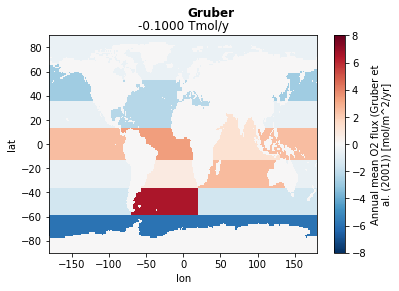

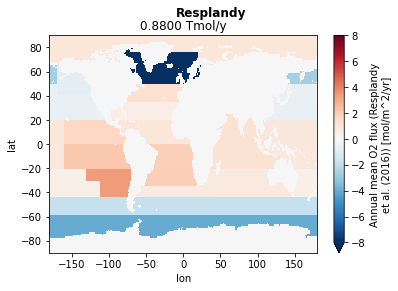

In [8]:
dsets_ann = {}
for product in ["Gruber", "Resplandy"]:
    fig = plt.figure()    
    ds_ann = fgo2_gk2001.open_inversion_annual_flux(product, gk_grid=True)
    ds_ann.fgo2.plot(vmin=-8., vmax=8., cmap='RdBu_r')
    dsets_ann[product] = ds_ann
    glb_sum = (ds_ann.fgo2 * ds_ann.area).sum() / 1e12
    plt.title(f"{glb_sum.values:0.4f} Tmol/y")
    fig.suptitle(product, fontweight="bold")    
ds_ann.fgo2  

### Make some quick plots of the fluxes

## Apply annual mean fluxes from Gruber et al. 2001 & Resplandy et al. 2016

In [9]:
src_grid = regrid_tools.grid("latlon", nx=ds.lon.size, ny=ds.lat.size, lon0=-180.)
src_grid

exists: /glade/scratch/mclong/tmp/regridding/latlon_1.125x1.125_lon0=-180.0.nc


grid: latlon_latlon_1.125x1.125_lon0=-180.0
dims: (160, 320)
file: /glade/scratch/mclong/tmp/regridding/latlon_1.125x1.125_lon0=-180.0.nc

In [10]:
dst_grid = regrid_tools.grid("latlon", **config.config_dict["flux-dst-grid-kwargs"])
dst_grid

exists: /glade/scratch/mclong/tmp/regridding/latlon_1.0x1.0_lon0=-180.0.nc


grid: latlon_latlon_1.0x1.0_lon0=-180.0
dims: (180, 360)
file: /glade/scratch/mclong/tmp/regridding/latlon_1.0x1.0_lon0=-180.0.nc

In [11]:
dst_grid_ds = util.generate_latlon_grid(**config.config_dict["flux-dst-grid-kwargs"])[["area"]]
dst_grid_ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    area     (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08

In [12]:
regrid_obj = regrid_tools.regridder(src_grid, dst_grid, method="conserve")
regrid_obj

source grid dims: (160, 320)
destination grid dims: (180, 360)


regridder latlon_1.125x1.125_lon0=-180.0.nc --> latlon_1.0x1.0_lon0=-180.0.nc

In [13]:
dirout = config.flux_product_dir
clobber = True
file_out = {}
dsets = {}
for product in ["Gruber", "Resplandy"]:

    dso_src = ds[["fgo2_sea", "fgo2_thm_sea", "fgo2_bio_sea"]]
    dso_src["fgo2"] = xr.full_like(ds.fgo2_sea, fill_value=0.)
    dso_src.fgo2.values = ds.fgo2_sea + dsets_ann[product].fgo2
    dso_src.fgo2.attrs["long_name"] = f"GK01 O$_2$ seasonal flux w/ {product} ann mean"
    dso_src.fgo2.encoding["_FillValue"] =  default_fillvals["f8"]

    dso = dst_grid_ds.copy()
    dso_dst_data = regrid_obj(dso_src)
    for v in dso_dst_data.data_vars:
        dso[v] = dso_dst_data[v]
    dso["date"] = ds.date
    dso["climatology_bounds"] = ds.climatology_bounds
    
    for v in dso.data_vars:
        if "_FillValue" not in dso[v].encoding:
            dso[v].encoding["_FillValue"] = None

    file_out[product] = f"{dirout}/fgo2.garcia-keeling.monclim.shft_{shift_time:0.0f}d.scale_{scaleby}.{product.lower()}_ann.nc"    
    
    if clobber and os.path.exists(file_out[product]):
        os.remove(file_out[product])
    
    if not os.path.exists(file_out[product]):
        print(f"writing {file_out[product]}")
        util.to_netcdf_clean(dso, file_out[product])
dso        

writing /glade/work/mclong/sno-analysis/flux-products/fgo2.garcia-keeling.monclim.shft_0d.scale_0.82.gruber_ann.nc
------------------------------
Writing /glade/work/mclong/sno-analysis/flux-products/fgo2.garcia-keeling.monclim.shft_0d.scale_0.82.gruber_ann.nc
netcdf fgo2.garcia-keeling.monclim.shft_0d.scale_0.82.gruber_ann {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 12 ;
	d2 = 2 ;
variables:
	double lat(lat) ;
	double lon(lon) ;
	float area(lat, lon) ;
		area:_FillValue = 9.96921e+36f ;
		area:units = "m^2" ;
		area:long_name = "area" ;
	double time(time) ;
		time:shift_time = 0. ;
		time:climatology = "climatology_bounds" ;
		time:units = "days since 2009-01-01" ;
		time:calendar = "gregorian" ;
	float fgo2_sea(time, lat, lon) ;
		fgo2_sea:_FillValue = 9.96921e+36f ;
		fgo2_sea:long_name = "O2 flux (monthly anomaly)" ;
		fgo2_sea:units = "mol/m^2/yr" ;
		fgo2_sea:note = "GK2001 adjustments applied: scaleby = 0.82" ;
	float fgo2_thm_sea(time, lat, lon) ;
		fgo2_thm_sea:_FillValue 

<xarray.Dataset>
Dimensions:             (lat: 180, lon: 360, time: 12, d2: 2)
Coordinates:
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) object 2009-01-17 00:00:00 ... 2009-12-17 00:0...
Dimensions without coordinates: d2
Data variables:
    area                (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08
    fgo2_sea            (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_thm_sea        (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2_bio_sea        (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    fgo2                (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    date                (time) int64 20090117 20090215 ... 20091116 20091217
    climatology_bounds  (time, d2) object 2009-01-01 00:00:00 ... 2009-01-01 ...

## Make catalog entry

In [14]:
catalog_file = "catalogs/fgo2_gk2001-catalog-local.yml"
catalog = yaml.safe_load(
    """
    description: Garcia and Keeling (2001) flux datasets 

    plugins:
      source:
        - module: intake_xarray

    sources: {}
    """
)
for product, file in file_out.items():
    key = f"fgo2_gk2001_{product}"
    source = dict(
        driver="netcdf",
        description=f"GK2001 seasional fluxes with {product} annual mean; time axis shifted by {shift_time}d, fluxes scaled by {scaleby}",
        args=dict(
            urlpath=file,
        )
    )
    catalog["sources"][key] = source

with open(catalog_file, "w") as fid:
    yaml.dump(catalog, fid)    

### Test intake catalog

In [15]:
cat = intake.open_catalog(catalog_file)
cat

fgo2_gk2001-catalog-local:
  args:
    path: catalogs/fgo2_gk2001-catalog-local.yml
  description: Garcia and Keeling (2001) flux datasets
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


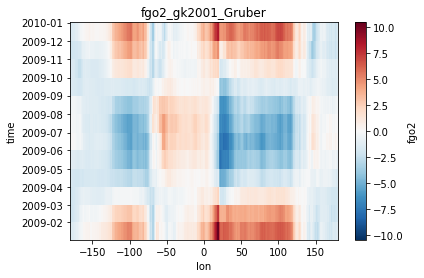

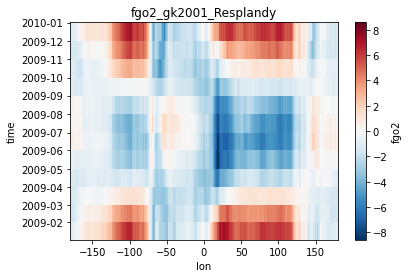

In [21]:
for key in cat._entries.keys():
    dsi = cat[key].to_dask().compute()
    plt.figure()
    dsi.fgo2.mean('lat').plot()
    plt.title(key)